Теперь решаем задачу регрессии - предскажем цены на недвижимость. 

Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

    Построить случайный лес, вывести важность признаков

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data = data.drop(['Id',], axis = 1)

In [5]:
first_cat = ['MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'OverallQual',
'OverallCond',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'SaleType',
'SaleCondition']

In [6]:
categ = data[first_cat]

In [7]:
categ

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
categ.fillna('NA', inplace=True)

c:\users\ilkol\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
categ = pd.get_dummies(categ, columns = first_cat)

In [10]:
categ

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
data = data.drop(first_cat, axis = 1)

In [12]:
data = pd.concat([data, categ], axis=1)

In [13]:
data = data.dropna()

In [14]:
categ = data[categ.columns]
categ

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
data = data.drop(categ.columns, axis = 1)

In [16]:
y = data['SalePrice']

In [17]:
data = data.drop(['SalePrice'], axis = 1)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(data))
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.233570,-0.205885,0.992930,0.823953,0.462009,0.571581,-0.282645,-0.986817,-0.496377,-0.822753,...,0.235641,-0.760257,0.231036,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,0.153084
1,0.384834,-0.064358,0.120665,-0.460746,-0.572748,1.152559,-0.282645,-0.689078,0.415045,0.229055,...,-0.224712,1.686090,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-0.498715,-0.596291
2,-0.109889,0.138702,0.928317,0.776371,0.282510,0.101672,-0.282645,-0.355789,-0.352705,-0.656951,...,0.549518,-0.760257,-0.064173,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.990125,0.153084
3,-0.439705,-0.070512,-1.850006,-0.746235,-0.572748,-0.475034,-0.282645,-0.120264,-0.720866,-0.550734,...,0.727382,-0.760257,-0.172934,4.083851,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,-1.345665
4,0.549742,0.509132,0.896011,0.681208,1.275032,0.462647,-0.282645,-0.231360,0.152394,-0.074052,...,1.742250,0.815913,0.588393,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,2.106755,0.153084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,-0.357251,-0.271480,0.863705,0.681208,-0.572748,-0.936399,-0.282645,0.797394,-0.278624,-0.571459,...,-0.224712,-0.760257,-0.095247,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.617915,-0.596291
1117,0.590968,0.375605,0.185277,0.110231,0.055497,0.751000,0.750581,-0.011389,1.043612,2.330081,...,-0.015461,2.104761,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,1.651832
1118,-0.192343,-0.133030,-1.010048,0.966697,-0.572748,-0.349013,-0.282645,0.628527,0.168108,0.037346,...,-1.312819,-0.760257,0.215498,-0.356622,-0.11253,-0.278676,-0.072999,14.947388,-0.498715,1.651832
1119,-0.109889,-0.049960,-0.719293,0.490883,-0.572748,-0.831738,6.239990,-1.320107,0.001987,-0.247626,...,-1.375594,2.244317,-0.716739,1.471808,-0.11253,-0.278676,-0.072999,-0.141407,-0.870925,1.651832


In [19]:
categ = categ.reset_index(drop = True)

In [20]:
X = pd.concat([data_scaled, categ], axis=1)

In [21]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.233570,-0.205885,0.992930,0.823953,0.462009,0.571581,-0.282645,-0.986817,-0.496377,-0.822753,...,0,0,0,1,0,0,0,0,1,0
1,0.384834,-0.064358,0.120665,-0.460746,-0.572748,1.152559,-0.282645,-0.689078,0.415045,0.229055,...,0,0,0,1,0,0,0,0,1,0
2,-0.109889,0.138702,0.928317,0.776371,0.282510,0.101672,-0.282645,-0.355789,-0.352705,-0.656951,...,0,0,0,1,0,0,0,0,1,0
3,-0.439705,-0.070512,-1.850006,-0.746235,-0.572748,-0.475034,-0.282645,-0.120264,-0.720866,-0.550734,...,0,0,0,1,1,0,0,0,0,0
4,0.549742,0.509132,0.896011,0.681208,1.275032,0.462647,-0.282645,-0.231360,0.152394,-0.074052,...,0,0,0,1,0,0,0,0,1,0


In [22]:
y = y.reset_index(drop = True)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=0.5, min_samples_leaf=20,
                      n_estimators=10, n_jobs=-1)

In [25]:
clf_rf.score(X_test, y_test)

0.7458396345751899

In [26]:
imp = pd.Series(clf_rf.feature_importances_)
imp.sort_values(ascending=False)

203    0.240509
22     0.211570
12     0.144195
2      0.100496
23     0.082857
         ...   
223    0.000000
224    0.000000
225    0.000000
226    0.000000
167    0.000000
Length: 335, dtype: float64

In [27]:
X.columns[203]

'ExterQual_TA'

Данный признак оценивает качество материала экстерьера. Значение обычный/не обычный оказывает большое влияние на цену. 

In [34]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

In [35]:
regressor = StackingRegressor(
    [
        ('lr', LinearRegression()),
        ('svr', LinearSVR(random_state=42)),
        ('dt', RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1))
    ],
LinearRegression())

In [36]:
regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('svr', LinearSVR(random_state=42)),
                              ('dt',
                               RandomForestRegressor(max_depth=5,
                                                     max_features=0.5,
                                                     min_samples_leaf=20,
                                                     n_estimators=10,
                                                     n_jobs=-1))],
                  final_estimator=LinearRegression())

In [43]:
pd.Series(regressor.final_estimator_.coef_.flatten(), index=regressor.named_estimators_.keys())

lr     2.821677e-12
svr   -1.599651e+00
dt     1.148328e+00
dtype: float64

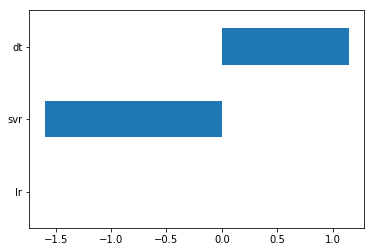

In [42]:
pd.Series(regressor.final_estimator_.coef_.flatten(), index=regressor.named_estimators_.keys()).plot(kind='barh')

In [44]:
regressor.score(X_test, y_test)

0.7414471081319207